In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

df = pd.read_csv("processed.cleveland.data", names=column_names)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [26]:
# Replace ? with NaN
df.replace("?", np.nan, inplace=True)

# Convert columns with '?' to numeric
df["ca"] = pd.to_numeric(df["ca"], errors="coerce")
df["thal"] = pd.to_numeric(df["thal"], errors="coerce")

# Drop rows with any missing values
df_clean = df.dropna().copy()

# Convert target to binary: 0 = no heart disease, 1 = presence
df_clean["target"] = df_clean["num"].apply(lambda x: 1 if x > 0 else 0)

# Drop original target column
df_clean.drop(columns="num", inplace=True)

# Check structure
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


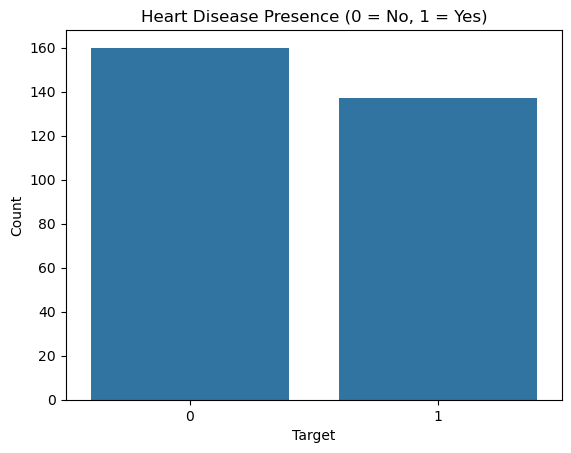

target
0    160
1    137
Name: count, dtype: int64


In [27]:
sns.countplot(data=df_clean, x='target')
plt.title("Heart Disease Presence (0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

print(df_clean['target'].value_counts())

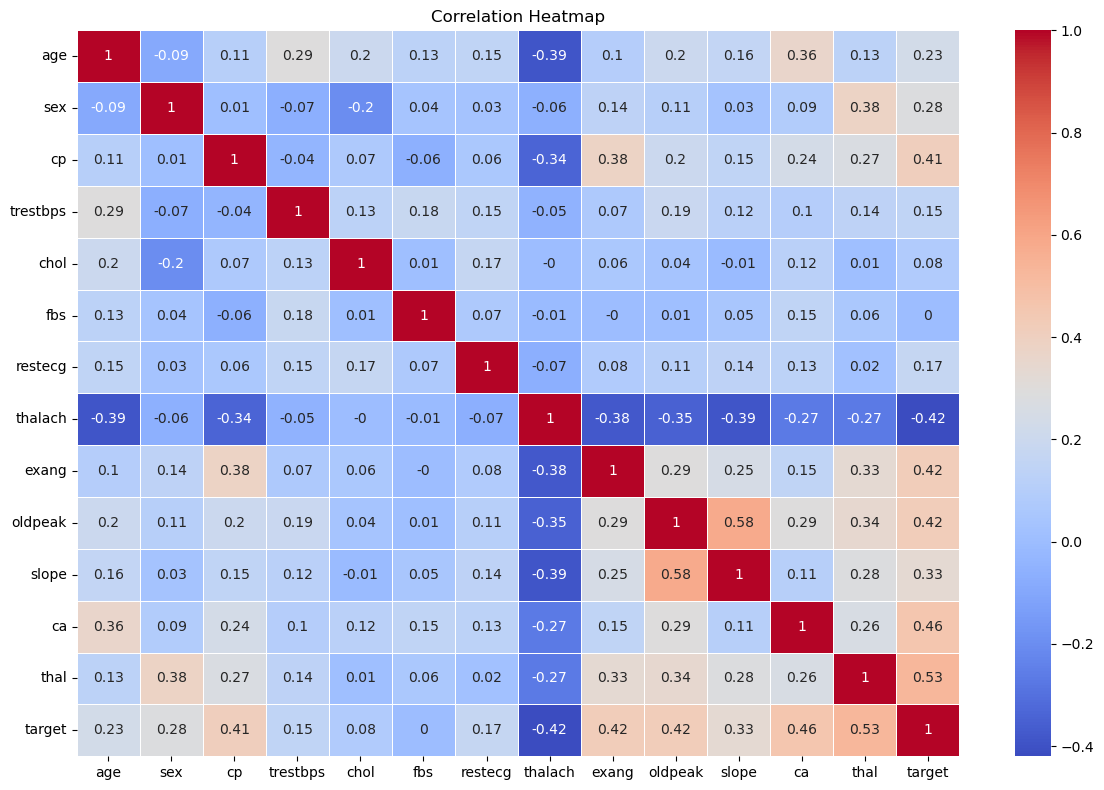

In [28]:
plt.figure(figsize=(12, 8))
corr = df_clean.corr().round(2)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

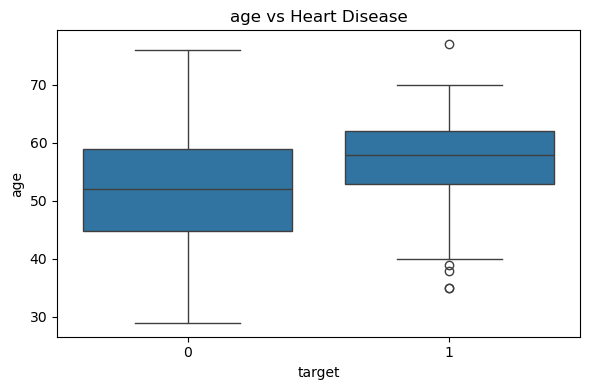

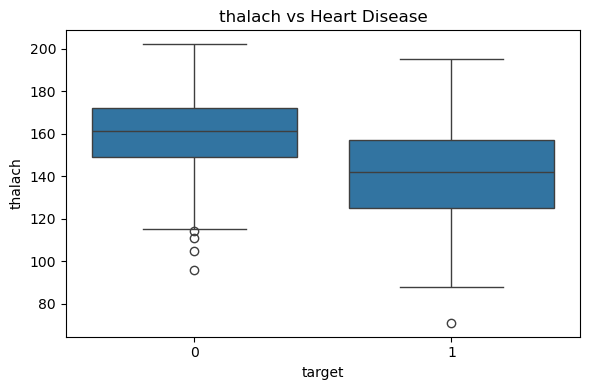

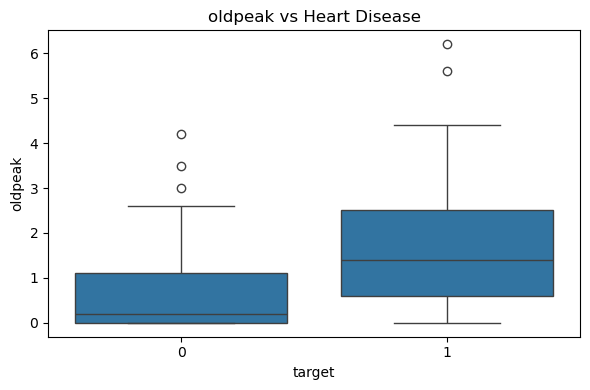

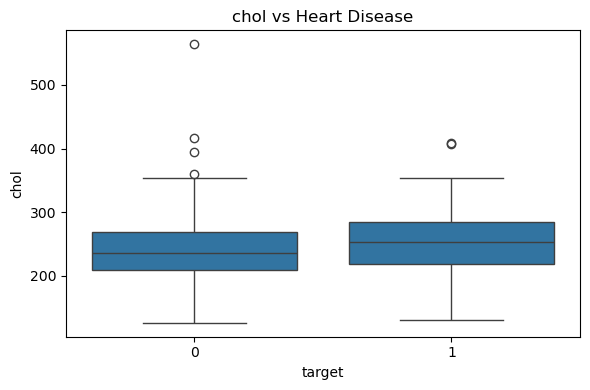

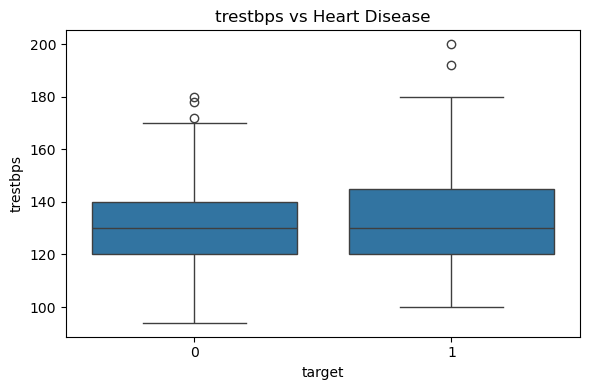

In [29]:
features = ['age', 'thalach', 'oldpeak', 'chol', 'trestbps']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_clean, x='target', y=feature)
    plt.title(f"{feature} vs Heart Disease")
    plt.tight_layout()
    plt.show()

In [30]:
X = df_clean.drop(columns='target')
y = df_clean['target']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [34]:
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

In [35]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8333
Precision: 0.8462
Recall: 0.7857
F1 Score: 0.8148
ROC AUC: 0.9498


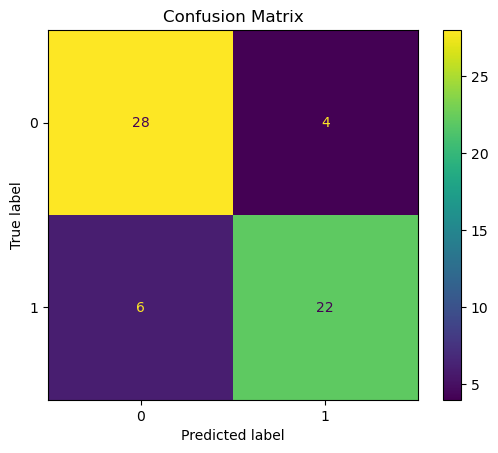

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


     Feature  Coefficient
11        ca     0.958868
12      thal     0.738721
2         cp     0.508254
1        sex     0.484017
9    oldpeak     0.445122
3   trestbps     0.420226
8      exang     0.372667
10     slope     0.352665
5        fbs    -0.331244
6    restecg     0.303953
4       chol     0.222311
7    thalach    -0.207123
0        age    -0.037069


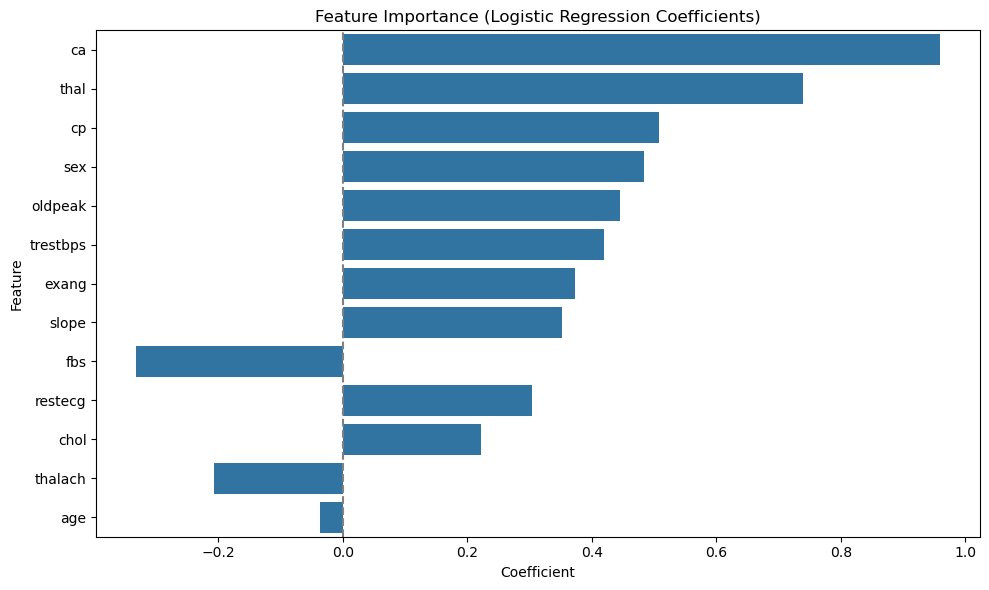

In [37]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
